#1 Next-Letter Guesser

### 🔠 Character-Level Prediction with Simple RNN

This example demonstrates how a **Simple Recurrent Neural Network (RNN)** can learn basic character-level dependencies from a small word — `"Macaroni"` — and predict the next character in a sequence.

#### 🧩 Steps Overview:

1. **Data Preparation**:
   - The input string is converted into unique characters.
   - Each character is encoded into integers and then one-hot vectors using `to_categorical()`.
   - Input and output sequences are constructed such that the model learns to predict the next character given the current one.

2. **Model Architecture**:
   - A **SimpleRNN layer** with 8 hidden units is used to learn the sequence pattern.
   - A **Dense output layer** with softmax activation returns a probability distribution over possible next characters.

3. **Training**:
   - The model is trained for 200 epochs on this short sequence.
   - Despite limited data, the model learns basic positional character transitions (e.g., from `'c'` → `'a'` in `"Macaroni"`).

4. **Prediction**:
   - A single character is used as input, and the model predicts the most likely next character based on what it has learned.

This simple experiment is a great way to introduce the concept of RNNs for sequence modeling, especially in the context of character-level language modeling.

In [ ]:
# ✅ Step 1: Import Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

# ✅ Step 2: Prepare Data
text = "Macaroni"
chars = sorted(list(set(text)))
char_to_int = {ch: i for i, ch in enumerate(chars)}
int_to_char = {i: ch for ch, i in char_to_int.items()}

X = []
y = []

# Create sequences
for i in range(len(text) - 1):
    X.append(char_to_int[text[i]])
    y.append(char_to_int[text[i + 1]])

# Reshape for RNN input: (samples, time_steps, features)
X = to_categorical(X, num_classes=len(chars)).reshape(len(X), 1, len(chars))
y = to_categorical(y, num_classes=len(chars))

# ✅ Step 3: Build RNN Model
model = Sequential()
model.add(SimpleRNN(8, input_shape=(1, len(chars)), activation='tanh'))
model.add(Dense(len(chars), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ✅ Step 4: Train the Model
model.fit(X, y, epochs=200, verbose=0)

# ✅ Step 5: Make Predictions
test_char = "c"
test_input = to_categorical([char_to_int[test_char]], num_classes=len(chars)).reshape(1, 1, len(chars))

prediction = model.predict(test_input)
predicted_char = int_to_char[np.argmax(prediction)]

print(f"Given input: '{test_char}' → Predicted next char: '{predicted_char}'")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Given input: 'c' → Predicted next char: 'a'


### 2a 🧠 Sentiment Classification with Simple RNN (Text File Input)

This notebook demonstrates how to perform binary sentiment classification using a **Simple Recurrent Neural Network (RNN)** on a small custom dataset (`sentiment_500.txt`). The dataset consists of labeled text samples, each tagged as either **positive (`POS`)** or **negative (`NEG`)**. The goal is to classify new sentences based on learned sentiment patterns.

**Pipeline Overview:**

1. **Data Loading**: Read and parse each sentence-label pair from the `.txt` file.
2. **Text Preprocessing**:
   - Convert text into tokens using a `Tokenizer`.
   - Pad sequences to a fixed maximum length for batch processing.
3. **Model Architecture**:
   - An **Embedding layer** to convert tokens into dense vectors.
   - A **SimpleRNN layer** to capture temporal dependencies in word sequences.
   - A **Dense layer** with sigmoid activation to output binary sentiment.
4. **Training**:
   - The model is trained for 10 epochs on 80% of the data and validated on the remaining 20%.
   - Accuracy and loss trends are plotted to assess learning.
5. **Evaluation**:
   - A prediction function is implemented to test new, unseen sentences and display their predicted sentiment.

This simple yet effective setup is ideal for small-scale projects or instructional use, allowing students to understand RNNs' role in processing and learning from sequential text data.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_12 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 - 3s - 220ms/step - accuracy: 0.7275 - loss: 0.6482 - val_accuracy: 0.2300 - val_loss: 0.7621
Epoch 2/10
13/13 - 0s - 13ms/step - accuracy: 0.9350 - loss: 0.4906 - val_accuracy: 0.2600 - val_loss: 0.8472
Epoch 3/10
13/13 - 0s - 14ms/step - accuracy: 0.9800 - loss: 0.2474 - val_accuracy: 0.3000 - val_loss: 1.0849
Epoch 4/10
13/13 - 0s - 28ms/step - accuracy: 0.9825 - loss: 0.1004 - val_accuracy: 0.3500 - val_loss: 1.4158
Epoch 5/10
13/13 - 0s - 22ms/step - accuracy: 0.9925 - loss: 0.0543 - val_accuracy: 0.3300 - val_loss: 1.4921
Epoch 6/10
13/13 - 0s - 20ms/step - accuracy: 0.9950 - loss: 0.0329 - val_accuracy: 0.3600 - val_loss: 1.4002
Epoch 7/10
13/13 - 0s - 24ms/step - accuracy: 1.0000 - loss: 0.0205 - val_accuracy: 0.5200 - val_loss: 1.3281
Epoch 8/10
13/13 - 0s - 18ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 0.5000 - val_loss: 1.4294
Epoch 9/10
13/13 - 0s - 22ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.4300 - val_loss: 1.5897
Epoch 10/

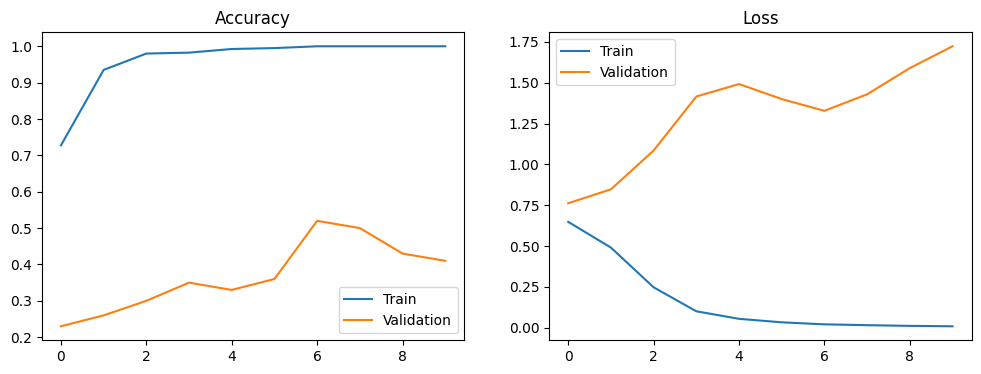

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Input: I really enjoyed the movie!
Prediction: Positive 😊 (0.98)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Input: It was not worth my time.
Prediction: Negative 😠 (0.01)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Input: I am not sure about my experience.
Prediction: Positive 😊 (0.89)


In [ ]:
# ✅ RNN Sentiment Analysis from Text File (Colab Ready)

# ✅ Step 1: Install and Import Libraries
!pip install -q tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

# ✅ Step 2: Load the Sentiment Text File
file_path = "/content/sentiment_500.txt"  # Make sure the file is uploaded to Colab

sentences = []
labels = []

with open(file_path, "r") as file:
    for line in file:
        text, sentiment = line.strip().split("\t")
        sentences.append(text.lower())
        labels.append(1 if sentiment == "POS" else 0)

# ✅ Step 3: Tokenization and Padding
vocab_size = 1000
max_length = 10

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')
labels = np.array(labels)

# ✅ Step 4: Build RNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    SimpleRNN(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ✅ Step 5: Train the Model
history = model.fit(padded, labels, epochs=10, validation_split=0.2, verbose=2)

# ✅ Step 6: Evaluate
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()
plt.show()

# ✅ Step 7: Predict New Sentences
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text.lower()])
    padded_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(padded_seq)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😠"
    print(f"Input: {text}\nPrediction: {sentiment} ({pred:.2f})")

# ✅ Test Prediction
predict_sentiment("I really enjoyed the movie!")
predict_sentiment("It was not worth my time.")
predict_sentiment("I am not sure about my experience.")

### 2b 🧠 Sentiment Analysis Using Simple RNN, Bidirectional LSTM, and GRU

In this experiment, we build and compare three popular Recurrent Neural Network (RNN) architectures — **Simple RNN**, **Bidirectional LSTM**, and **GRU** — to perform binary sentiment classification on a dataset of 6000 labeled text samples (3000 positive and 3000 negative).

Each sentence is labeled with either `POS` or `NEG`, and the dataset is read from a `.txt` file in the format:

```
This product was amazing and exceeded expectations.	POS
Terrible experience, never again.	NEG
```

We follow these steps:

1. **Data Loading**: Read the dataset from file, split into sentences and labels.
2. **Tokenization & Padding**: Convert text to sequences of integers and pad to fixed length.
3. **Modeling**: Build and train three separate models:
   - A **Simple RNN** layer
   - A **Bidirectional LSTM** with a dense intermediate layer and dropout
   - A **GRU** model with additional regularization
4. **Evaluation**:
   - Accuracy and loss graphs
   - Classification report (precision, recall, F1-score)
   - Predictions on 5 sample sentences

Each model uses a consistent vocabulary size, embedding dimension, batch size, and number of epochs to ensure a fair comparison. We use `sigmoid` activation to output binary sentiment and evaluate performance on a held-out test set.

This comparative analysis allows us to explore how sequence modeling depth and directionality affect sentiment classification accuracy.



Running model: RNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ (None, 20, 64)              │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,137 (512.25 KB)

 Trainable params: 131,137 (512.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
150/150 - 4s - 24ms/step - accuracy: 0.9721 - loss: 0.0765 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 2/20
150/150 - 2s - 15ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 9.3541e-04
Epoch 3/20
150/150 - 1s - 9ms/step - accuracy: 1.0000 - loss: 6.9699e-04 - val_accuracy: 1.0000 - val_loss: 5.2172e-04
Epoch 4/20
150/150 - 1s - 8ms/step - accuracy: 1.0000 - loss: 4.2073e-04 - val_accuracy: 1.0000 - val_loss: 3.3961e-04
Epoch 5/20
150/150 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.8618e-04 - val_accuracy: 1.0000 - val_loss: 2.4112e-04
Epoch 6/20
150/150 - 2s - 13ms/step - accuracy: 1.0000 - loss: 2.0894e-04 - val_accuracy: 1.0000 - val_loss: 1.8093e-04
Epoch 7/20
150/150 - 2s - 13ms/step - accuracy: 1.0000 - loss: 1.5986e-04 - val_accuracy: 1.0000 - val_loss: 1.4114e-04
Epoch 8/20
150/150 - 1s - 8ms/step - accuracy: 1.0000 - loss: 1.2647e-04 - val_accuracy: 1.0000 - val_loss: 1.1323e-04
Epoch 9/20
150/150 - 1s - 8ms/step - accuracy: 1.0000 - 

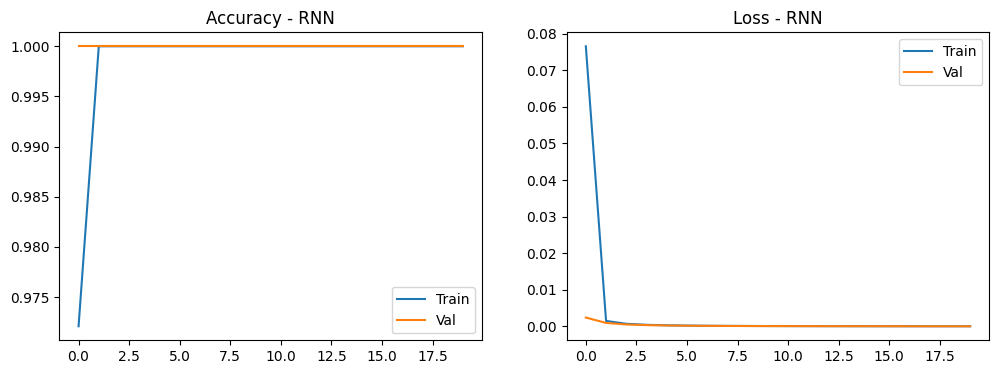

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Sample Sentence Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
  - 'I really hated the service and I want my money back.' => NEGATIVE (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
  - 'This is the best product I've ever used and I loved it.' => POSITIVE (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
  - 'It was okay, not bad but not great either.' => POSITIVE (0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
  - 'Highly recommend it for anyone looking for quality.' => POSITIVE (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  - 'Terrible experience, I’m disappointed.' => NEGATIVE (0.00)

Running model: BILSTM


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ (None, 20, 64)              │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196,129 (766.13 KB)

 Trainable params: 196,129 (766.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
150/150 - 8s - 54ms/step - accuracy: 0.8988 - loss: 0.2628 - val_accuracy: 1.0000 - val_loss: 8.6447e-04
Epoch 2/20
150/150 - 6s - 39ms/step - accuracy: 0.9998 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 2.9959e-05
Epoch 3/20
150/150 - 4s - 24ms/step - accuracy: 0.9998 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 2.1932e-05
Epoch 4/20
150/150 - 3s - 23ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 2.0680e-06
Epoch 5/20
150/150 - 6s - 43ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 1.8705e-06
Epoch 6/20
150/150 - 3s - 23ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 5.8477e-07
Epoch 7/20
150/150 - 4s - 24ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 2.5231e-07
Epoch 8/20
150/150 - 7s - 44ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 1.3172e-07
Epoch 9/20
150/150 - 4s - 25ms/step - accuracy: 1.0000 - loss: 0.0083 - 

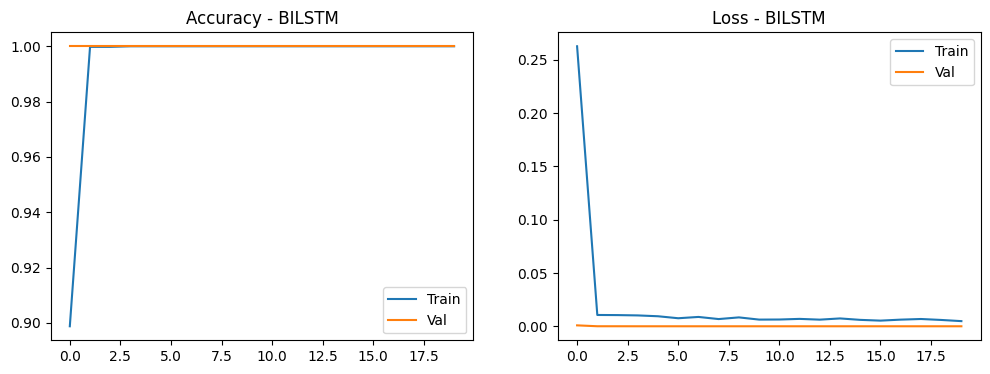

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Sample Sentence Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
  - 'I really hated the service and I want my money back.' => NEGATIVE (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
  - 'This is the best product I've ever used and I loved it.' => POSITIVE (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
  - 'It was okay, not bad but not great either.' => NEGATIVE (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
  - 'Highly recommend it for anyone looking for quality.' => POSITIVE (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
  - 'Terrible experience, I’m disappointed.' => NEGATIVE (0.00)

Running model: GRU


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ (None, 20, 64)              │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,017 (601.63 KB)

 Trainable params: 154,017 (601.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
150/150 - 7s - 44ms/step - accuracy: 0.5046 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
150/150 - 4s - 27ms/step - accuracy: 0.8481 - loss: 0.2622 - val_accuracy: 1.0000 - val_loss: 3.2180e-05
Epoch 3/20
150/150 - 2s - 15ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 5.2729e-06
Epoch 4/20
150/150 - 3s - 19ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 1.5245e-06
Epoch 5/20
150/150 - 3s - 20ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 4.8451e-07
Epoch 6/20
150/150 - 2s - 14ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 2.2912e-07
Epoch 7/20
150/150 - 3s - 17ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 1.0388e-07
Epoch 8/20
150/150 - 2s - 15ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 5.5011e-08
Epoch 9/20
150/150 - 3s - 18ms/step - accuracy: 1.0000 - loss: 0.0019 - val_

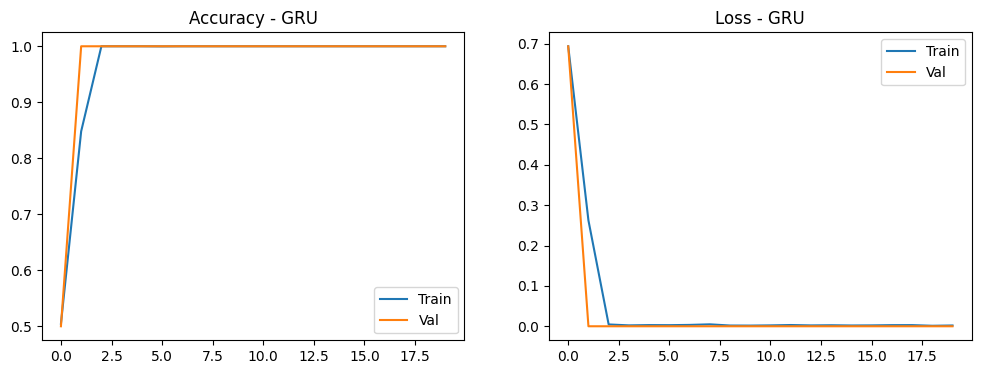

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Sample Sentence Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
  - 'I really hated the service and I want my money back.' => NEGATIVE (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  - 'This is the best product I've ever used and I loved it.' => POSITIVE (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
  - 'It was okay, not bad but not great either.' => POSITIVE (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
  - 'Highly recommend it for anyone looking for quality.' => POSITIVE (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
  - 'Terrible experience, I’m disappointed.' => NEGATIVE (0.00)


In [ ]:
# ✅ Sentiment Analysis Using Simple RNN, Bidirectional LSTM, and GRU

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# ✅ Step 1: Load Labeled Data from sentiment_6000.txt
sentences = []
labels = []

with open("/content/sentiment_6000.txt", "r") as file:
    for line in file:
        try:
            sent, label = line.strip().split("\t")
            if len(sent.split()) >= 3:
                sentences.append(sent)
                labels.append(1 if label == "POS" else 0)
        except:
            continue  # skip malformed lines if any

# ✅ Step 2: Tokenize and Pad Sequences
vocab_size = 2000
max_length = 20

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
labels = np.array(labels)

# ✅ Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# ✅ Helper function to build, train, and evaluate model
def run_model(model_type="rnn"):
    print(f"\nRunning model: {model_type.upper()}")
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

    if model_type == "rnn":
        model.add(SimpleRNN(32))
    elif model_type == "bilstm":
        model.add(Bidirectional(LSTM(64, return_sequences=False)))
        model.add(Dense(16, activation='relu'))
        model.add(Dropout(0.3))
    elif model_type == "gru":
        model.add(GRU(64))
        model.add(Dense(16, activation='relu'))
        model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.build(input_shape=(None, max_length))
    model.summary()

    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2, batch_size=32)

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {acc*100:.2f}%")

    # Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f"Accuracy - {model_type.upper()}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f"Loss - {model_type.upper()}")
    plt.legend()
    plt.show()

    # Report
    pred_probs = model.predict(X_test)
    y_pred = (pred_probs > 0.5).astype(int)
    print(classification_report(y_test, y_pred))

    # Predict on sample sentences
    print("\nSample Sentence Predictions:")
    sample_sentences = [
        "I really hated the service and I want my money back.",
        "This is the best product I've ever used and I loved it.",
        "It was okay, not bad but not great either.",
        "Highly recommend it for anyone looking for quality.",
        "Terrible experience, I’m disappointed."
    ]

    for s in sample_sentences:
        seq = tokenizer.texts_to_sequences([s])
        pad = pad_sequences(seq, maxlen=max_length, padding='post')
        pred = model.predict(pad)[0][0]
        sentiment = "POSITIVE" if pred > 0.5 else "NEGATIVE"
        print(f"  - '{s}' => {sentiment} ({pred:.2f})")

    return model

# ✅ Run all three models
rnn_model = run_model("rnn")
bilstm_model = run_model("bilstm")
gru_model = run_model("gru")


### 3 🧠 Character-Level Text Generation with Simple RNN

This code demonstrates how to use a **Simple Recurrent Neural Network (RNN)** to learn and generate sequences of text at the character level. Given a short input string, the model is trained to predict the **next character** based on a fixed-length history (sequence length = 3).

#### 🔧 Workflow Overview:

1. **Text Preparation**:
   - The input string (`"This is Deep learning Lecture for RNN.."`) is broken into all possible character sequences of length 3.
   - Each sequence serves as input, with the next character serving as the label.
   - Characters are mapped to integers and converted into **one-hot encoded vectors**.

2. **Model Architecture**:
   - A **SimpleRNN layer** with 50 units captures temporal dependencies in character sequences.
   - A **Dense output layer** with softmax activation outputs a probability distribution over all possible characters.

3. **Training**:
   - The model is trained to predict the next character from 3-character sequences using categorical cross-entropy loss.

4. **Text Generation**:
   - Starting with a seed sequence (`"This is D"`), the model generates 50 additional characters by iteratively predicting the next character and appending it to the input.

This project provides a great introduction to sequence modeling and shows how RNNs can be used for **creative text generation**, mimicking the style and structure of a given text.

In [ ]:
#Importing Liberaries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

#giving past data so model can predict next character
text = "This is Deep learning Lecture for RNN.."
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])
X = np.array(sequences)
y = np.array(labels)
X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

#model selection
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=110)

#Checking for how accurate model can predict next..
start_seq = "This is D"
generated_text = start_seq
for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

#gaetting final prediction as output
print("Generated Text:")
print(generated_text)


Epoch 1/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0868 - loss: 3.1032
Epoch 2/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0764 - loss: 3.0829
Epoch 3/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0868 - loss: 3.0525
Epoch 4/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0949 - loss: 3.0395
Epoch 5/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1053 - loss: 3.0061
Epoch 6/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1343 - loss: 2.9944
Epoch 7/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1447 - loss: 2.9778
Epoch 8/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1632 - loss: 2.9576
Epoch 9/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1817 - loss: 2.9438
Epoch 10/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3264 - loss: 2.9207
Epoch 11/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3264 - loss: 2.9073
Epoch 12/110
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3738 - lo